In class programming:
1. Follow the instruction below and then report how the performance changed.(apply all at once)

• Convolutional input layer, 32 feature maps with a size of 3×3 and a rectifier activation function.

• Dropout layer at 20%.

• Convolutional layer, 32 feature maps with a size of 3×3 and a rectifier activation function.

• Max Pool layer with size 2×2.

• Convolutional layer, 64 feature maps with a size of 3×3 and a rectifier activation function.

• Dropout layer at 20%.

• Convolutional layer, 64 feature maps with a size of 3×3 and a rectifier activation function.

• Max Pool layer with size 2×2.

• Convolutional layer, 128 feature maps with a size of 3×3 and a rectifier activation function.

• Dropout layer at 20%.

• Convolutional layer,128 feature maps with a size of 3×3 and a rectifier activation function.

• Max Pool layer with size 2×2.

• Flatten layer.

• Dropout layer at 20%.

• Fully connected layer with 1024 units and a rectifier activation function.
• Dropout layer at 20%.

• Fully connected layer with 512 units and a rectifier activation function.
• Dropout layer at 20%.

• Fully connected output layer with 10 units and a Softmax activation function

In [2]:
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.constraints import MaxNorm
from keras.optimizers import SGD
from keras.utils import to_categorical
from keras.optimizers.schedules import ExponentialDecay
import matplotlib.pyplot as plt

# Fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# Load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

170498071/170498071 [==============================] - 5s 0us/step


In [3]:
# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=MaxNorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=MaxNorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_constraint=MaxNorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_constraint=MaxNorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_constraint=MaxNorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_constraint=MaxNorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu', kernel_constraint=MaxNorm(3)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu', kernel_constraint=MaxNorm(3)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

In [5]:
# Compile model
epochs = 5
lrate = 0.01
lr_schedule = ExponentialDecay(
    initial_learning_rate=lrate,
    decay_steps=epochs * len(X_train) // 32,
    decay_rate=0.1
)
sgd = SGD(learning_rate=lr_schedule, momentum=0.9, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1] * 100))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0         
                                                        

2. Predict the first 4 images of the test data using the above model. Then, compare with the actual label for those 4
images to check whether or not the model has predicted correctly.

1/1 [==============================] - 0s 313ms/step
Predicted classes:  [3 8 8 0]
Actual classes:  [3 8 8 0]


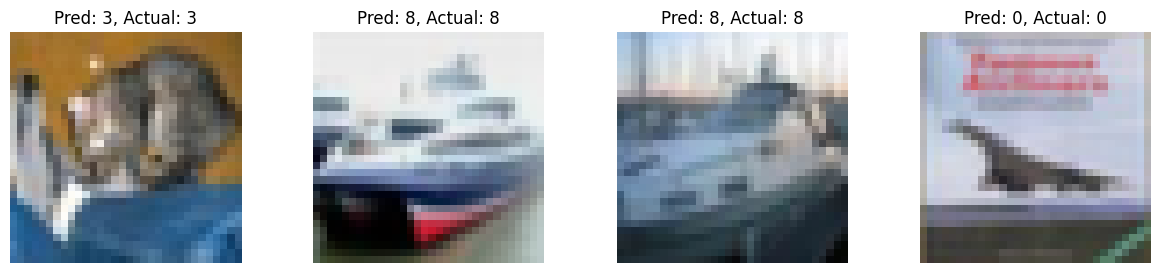

In [6]:
# Predict the first 4 images of the test data
predictions = model.predict(X_test[:4])
predicted_classes = np.argmax(predictions, axis=1)
actual_classes = np.argmax(y_test[:4], axis=1)

# Print the predictions and actual labels
print("Predicted classes: ", predicted_classes)
print("Actual classes: ", actual_classes)

# Plot the first 4 test images, predicted labels, and actual labels
fig, axes = plt.subplots(1, 4, figsize=(15, 3))
for i in range(4):
    axes[i].imshow(X_test[i])
    axes[i].set_title(f"Pred: {predicted_classes[i]}, Actual: {actual_classes[i]}")
    axes[i].axis('off')

3. Visualize Loss and Accuracy using the history object

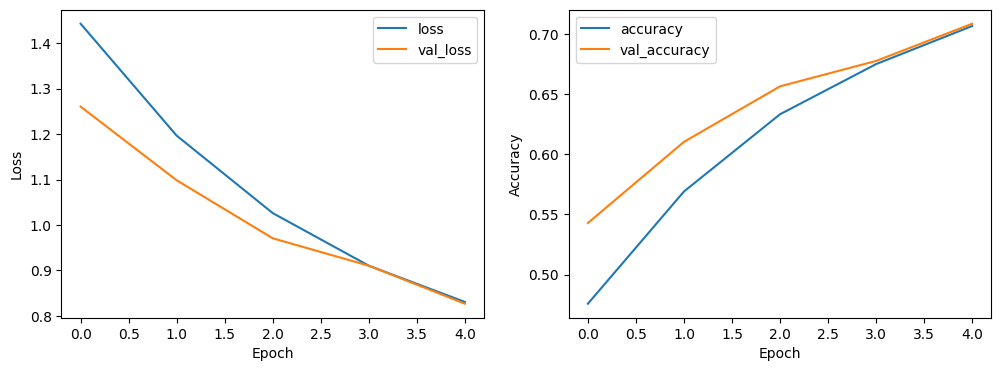

In [7]:
# Visualize loss and accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()